# **Indices de precios por consumo**

In [90]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import time

In [35]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL de la página web que contiene la tabla
url = 'https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/resultados/PN01288PM/html/1949-1/2021-12/'
r = requests.get(url)

# Verificar si la solicitud fue exitosa
if r.status_code == 200:
    # Crear el objeto BeautifulSoup para analizar el contenido HTML
    soup = BeautifulSoup(r.content, 'html.parser')

    # Encontrar la tabla con clase "series"
    table = soup.find('table', {'class': 'series'})

    # Crear listas vacías para almacenar los datos
    periods = []
    indices = []

    # Extraer los datos de las filas de la tabla
    for row in table.find_all('tr')[1:]:  # Saltar el encabezado
        period = row.find('td', {'class': 'periodo'})
        index = row.find('td', {'class': 'dato'})

        if period and index:
            # Obtener el texto de cada celda y quitar espacios innecesarios
            periods.append(period.text.strip())
            indices.append(index.text.strip())

    # Crear un DataFrame con los datos extraídos
    df = pd.DataFrame({'Fecha': periods, 'Índice IPC': indices})

    # Mostrar el DataFrame
    print(df)
else:
    print("No se pudo acceder a la página web.")

     Fecha Índice IPC
0    Ene92      19.70
1    Feb92      20.82
2    Mar92      21.89
3    Abr92      22.63
4    May92      23.41
..     ...        ...
355  Ago21     135.27
356  Sep21     135.42
357  Oct21     136.26
358  Nov21     136.99
359  Dic21     138.12

[360 rows x 2 columns]


In [36]:
# Diccionario para mapear nombres de meses en español a números
meses = {
    'Ene': '01', 'Feb': '02', 'Mar': '03', 'Abr': '04', 'May': '05', 'Jun': '06',
    'Jul': '07', 'Ago': '08', 'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dic': '12'
}

def convertir_fecha(fecha):
    mes_abbr=fecha[:3]
    año=fecha[3:]
    if int(año)<50:
        año_completo='20' + año
    else:
        año_completo='19'+año
    mes=meses[mes_abbr]
    return f'{año_completo}-{mes}'

df['Fecha']=df['Fecha'].apply(convertir_fecha)
df.head()

,Fecha,Índice IPC
0,1992-01,19.70
1,1992-02,20.82
2,1992-03,21.89
3,1992-04,22.63
4,1992-05,23.41


In [37]:
df['Fecha']=pd.to_datetime(df['Fecha'],format='%Y-%m')
df['Índice IPC']=pd.to_numeric(df['Índice IPC'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Fecha       360 non-null    datetime64[ns]
 1   Índice IPC  360 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [38]:
df.head()

,Fecha,Índice IPC
0,1992-01-01,19.70
1,1992-02-01,20.82
2,1992-03-01,21.89
3,1992-04-01,22.63
4,1992-05-01,23.41


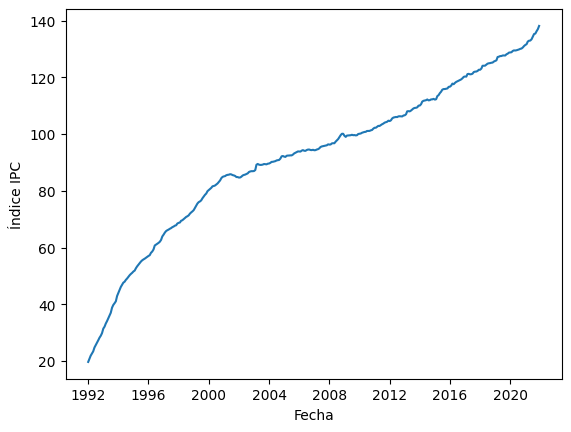

In [39]:
sns.lineplot(data=df,x='Fecha',y='Índice IPC')
plt.show()

# **Tipo de Cambio**

In [82]:
# URL de la página web que contiene la tabla
url = 'https://estadisticas.bcrp.gob.pe/estadisticas/series/diarias/resultados/PD04639PD/html'
r = requests.get(url)

# Verificar si la solicitud fue exitosa
if r.status_code == 200:
    # Crear el objeto BeautifulSoup para analizar el contenido HTML
    soup = BeautifulSoup(r.content, 'html.parser')

    # Encontrar la tabla con clase "series"
    table = soup.find('table')

    # Crear listas vacías para almacenar los datos
    periods_new = []
    indices_new = []

    # Extraer los datos de las filas de la tabla
    for row in table.find_all('tr')[1:]:  # Saltar el encabezado
        period = row.find('td', {'class': 'periodo'})
        index = row.find('td', {'class': 'dato'})

        if period and index:
            # Obtener el texto de cada celda y quitar espacios innecesarios
            periods_new.append(period.text.strip())
            indices_new.append(index.text.strip())

    # Crear un DataFrame con los datos extraídos
    df_cambio = pd.DataFrame({'Fecha': periods_new, 'Tipo de Cambio': indices_new})

    # Mostrar el DataFrame
    print(df_cambio)
else:
    print("No se pudo acceder a la página web.")

        Fecha Tipo de Cambio
0     02Ene97          2.599
1     03Ene97          2.607
2     06Ene97          2.613
3     07Ene97          2.625
4     08Ene97          2.627
...       ...            ...
7241  04Oct24          3.727
7242  07Oct24          3.732
7243  08Oct24           n.d.
7244  09Oct24          3.750
7245  10Oct24          3.761

[7246 rows x 2 columns]


In [83]:
# Diccionario para mapear nombres de meses en español a números
# Diccionario con los nombres de los meses abreviados en español
meses = {
    'Ene': '01', 'Feb': '02', 'Mar': '03', 'Abr': '04', 'May': '05', 'Jun': '06',
    'Jul': '07', 'Ago': '08', 'Set': '09', 'Oct': '10', 'Nov': '11', 'Dic': '12'
}

def convertir_fecha(fecha):
    # Extraer el día, mes y año de la cadena
    dia = fecha[:2]  # Los primeros dos caracteres son el día
    mes_abbr = fecha[2:5]  # Los siguientes tres caracteres son el mes en abreviatura
    año = fecha[5:]  # El resto de la cadena es el año

    # Convertir el año al formato completo
    if int(año) < 50:
        año_completo = '20' + año
    else:
        año_completo = '19' + año

    # Convertir el mes a su formato numérico (01, 02, ..., 12)
    mes = meses.get(mes_abbr)

    # Retornar la fecha en formato YYYY-MM-DD
    return f'{año_completo}-{mes}-{dia}'



df_cambio['Fecha']=df_cambio['Fecha'].apply(convertir_fecha)
df_cambio.head()

,Fecha,Tipo de Cambio
0,1997-01-02,2.599
1,1997-01-03,2.607
2,1997-01-06,2.613
3,1997-01-07,2.625
4,1997-01-08,2.627


In [84]:
df_cambio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7246 entries, 0 to 7245
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fecha           7246 non-null   object
 1   Tipo de Cambio  7246 non-null   object
dtypes: object(2)
memory usage: 113.3+ KB


In [85]:
df_cambio['Fecha']=pd.to_datetime(df_cambio['Fecha'],format='%Y-%m-%d')
df_cambio['Tipo de Cambio']=pd.to_numeric(df_cambio['Tipo de Cambio'],errors='coerce')
df_cambio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7246 entries, 0 to 7245
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha           7246 non-null   datetime64[ns]
 1   Tipo de Cambio  6930 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 113.3 KB


In [86]:
df_cambio.isnull().sum()

Fecha               0
Tipo de Cambio    316
dtype: int64

In [87]:
# remplazar valores nulos
df_cambio['Tipo de Cambio'] = df_cambio['Tipo de Cambio'].fillna(method='ffill')

C:\Users\User\AppData\Local\Temp\ipykernel_16704\991355799.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cambio['Tipo de Cambio'] = df_cambio['Tipo de Cambio'].fillna(method='ffill')


In [88]:
df_cambio['Tipo de Cambio'].isnull().sum()

0

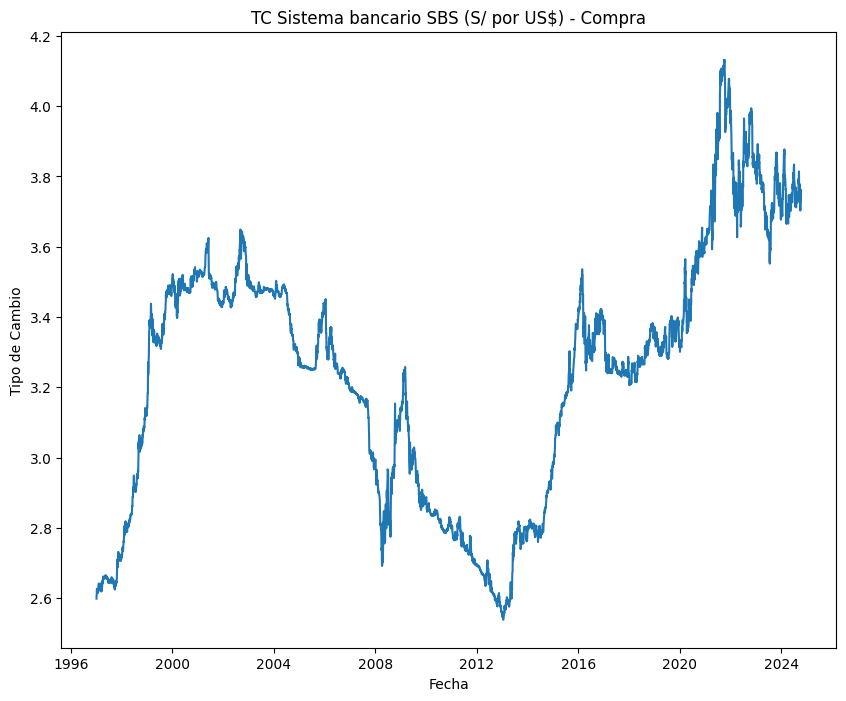

In [89]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df_cambio,x='Fecha',y='Tipo de Cambio')
plt.title('TC Sistema bancario SBS (S/ por US$) - Compra')
plt.show()

In [91]:
# Crear un gráfico de línea con Plotly Express
fig = px.line(df_cambio, x='Fecha', y='Tipo de Cambio', 
              title='TC Sistema bancario SBS (S/ por US$) - Compra')

# Mostrar el gráfico interactivo
fig.show()